## (10 pts) k-Nearest Neighbors (kNN) for Credit Card Fraud Detection

We will explore the application of non-parametric model to credit card fraud detection. <br/><br/>
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In this question, you are required to fill in the missing code, marked as `...` and answer inline question by creating mark-down cells.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### (1 pts) Loading data

In this part, we will use two features only -- `V14` and `V27`

In [2]:
# Importing the dataset
df = pd.read_csv('fraud_data.csv')
X = df.filter(['V14','V27']).values # select 'V14', 'V27' from the df. Use .values to get numpy 2-D array
y = df.filter(['Class']).values # select the column 'Class' from df. Use .values to get a 1-D numpy array

In [3]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0) # Designate 50% of the observations as test observations. Use random_state = 0

### (1 pts) Scaling data

Using StandardScaler scale features to 0 mean and unit variance Gaussian

In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler() # instantiate StandardScaler
X_train = standardScaler.fit(X_train).transform(X_train) # fit and tranform the training data
X_test = standardScaler.transform(X_test) # tranform test data


### (1 pts) Finding best k

Using GridSearch find the best parameter value for k

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score, accuracy_score

In [6]:
# Define param_map for different values of k
param_grid = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

# Fitting K-NN to the Training set. Use p=2 for Euclidean distance.
kNN = KNeighborsClassifier(p = 2, n_jobs = -1) # instantiate KNeighborsClassifier

# Use 5-fold cross validation to select best k
# use 'recall' metric to evaluate your model 

cmodel = GridSearchCV(kNN, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1, 
                    return_train_score=True) # instantiate GridSearchCV
cmodel.fit(X_train, y_train.ravel())

best_k = cmodel.best_params_ # get the best k learned through grid search
print('k = {} is selected using grid search'.format(best_k))

# Fit a KNeighborsClassifier using the best parameters from grid search. Use p=2 for Euclidean distance
kNN = cmodel.best_estimator_
kNN.fit(X_train, y_train.ravel())

# performance on Test Data
print('kNN recall = {}\nkNN accuracy = {}'.format(recall_score(y_test, kNN.predict(X_test)), 
                                                   accuracy_score(y_test, kNN.predict(X_test))))

k = {'n_neighbors': 3} is selected using grid search
kNN recall = 0.7541899441340782
kNN accuracy = 0.9938231769152761


### (4 pts) Visualizing and comparing decison boundaries of Logistic Regression and kNN



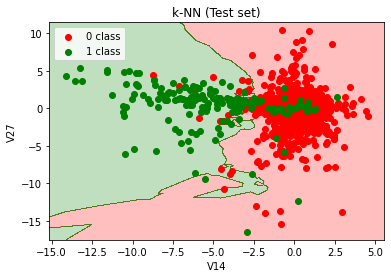

In [7]:
# Visualising kNN 
# on the Test set results
from matplotlib.colors import ListedColormap

# copying X_test, y_test to X_set and y_set. Remeber X has two columns
X_set, y_set = X_test, y_test 

# creating a meshgrid where each point is classifed using learned kNN
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, kNN.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# You need to fill-in the code in the following few lines

# scatter plot: Observations from X_set's first dimension vs X_set's second dimension 
# such that observations belong to class 0
plt.scatter(x=X_set[y_set.ravel() == 0,0],y=X_set[y_set.ravel() == 0,1], c = 'red', label = '0 class')

# scatter plot: Observations from X_set's first dimension vs X_set's second dimension 
# such that observations belong to class 1
plt.scatter(x=X_set[y_set.ravel() == 1,0],y=X_set[y_set.ravel() == 1,1], c = 'green', label = '1 class')

plt.title('k-NN (Test set)')
plt.xlabel('V14')
plt.ylabel('V27')
plt.legend()
plt.show()

Fitting a Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
# We will use default parameters for Logistic Regression here
logR = LogisticRegression(max_iter = 1000) # instantiate LogisticRegression
logR.fit(X_train, y_train.ravel()) # fit on X_train, y_train using logR

# Performance on Test data
print('Logistic Regression recall = {}\nLogistic Regression accuracy = {}'
      .format(recall_score(y_test, logR.predict(X_test)), accuracy_score(y_test, logR.predict(X_test))))

Logistic Regression recall = 0.7430167597765364
Logistic Regression accuracy = 0.994191942472573


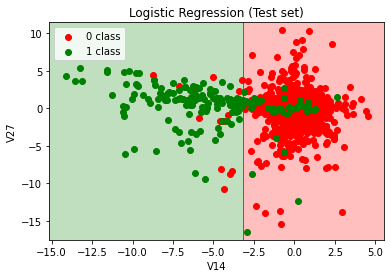

In [9]:
# Visualizing Logistic Regression on Test data
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logR.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.25, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# You need to fill-in the code in the following few lines

# scatter plot: Observations from X_set's fisrt dimension vs X_set's second dimension 
# such that observations belong to class 0
plt.scatter(x=X_set[y_set.ravel() == 0,0],y=X_set[y_set.ravel() == 0,1], c = 'red', label = '0 class')

# scatter plot: Observations from X_set's fisrt dimension vs X_set's second dimension 
# such that observations belong to class 1
plt.scatter(x=X_set[y_set.ravel() == 1,0],y=X_set[y_set.ravel() == 1,1], c = 'green', label = '1 class')

plt.title('Logistic Regression (Test set)')
plt.xlabel('V14')
plt.ylabel('V27')
plt.legend()
plt.show()

**What is the difference between the decision boundaries of kNN and Logistic Regression? Why would you expect the decision boundaries to be different? Explain in 2-3 sentences.**

***The logistic regression produces a linear decision boundary, while the kNN is far more complex and better fits the data.  This is because the linear regression is by definition using a linear decision boundary, while the kNN is free to use a more complex boundary.  Because kNN is non-parametric, it does not make an assumption on the form of the data like the logistic regression does.***

### (3 pts) Running time for Logistic Regression and kNN
For run time comparison, we will use all the features in the dataset.

In [10]:
# Creating train-test set using full dataset
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0) # do a train-test split and designate 50% samples as test set

In [11]:
import time

In [12]:
# Comparing Training time

# Fitting Logistic Regression using default parameters
logR = LogisticRegression(max_iter = 1000) # instantiate Logistic Regression 
start_time = time.time()
logR.fit(X_train, y_train.ravel())        #fit logR on X_train, y_train
end_time = time.time()

elapsed_time = end_time - start_time # find elapsed time

print('Elapsed time for Logistic Regression training is {} seconds'.format(elapsed_time))


# Fitting kNN using default parameters
kNN = kNN = KNeighborsClassifier(p = 2, n_jobs = -1) # instantiate KNeighborsClassifier
start_time = time.time()
kNN.fit(X_train, y_train.ravel())       # fir kNN on X_train, y_train
end_time = time.time()

elapsed_time = end_time - start_time # find elapsed time

print('Elapsed time for kNN classifier training is {} seconds'.format(elapsed_time))



Elapsed time for Logistic Regression training is 0.37868714332580566 seconds
Elapsed time for kNN classifier training is 0.05918717384338379 seconds


**What do you notice about the training time for the two classifiers? Explain why you observed this in 1-2 sentences.**  

***The time it takes to fit a logistic regression is slightly longer than the time it takes to fit the kNN.  This is because the logistic regression does most of its calculations at training, while the kNN will do most of its calculation at test time.***

In [13]:
# Comparing Test time

# Prediction using Logistic Regression
start_time = time.time()
y_pred = logR.predict(X_test) # use logR to predict on X_test
end_time = time.time()

elapsed_time = end_time - start_time # find elapsed time

print('Elapsed time for Logistic Regression prediction is {} seconds'.format(elapsed_time))

# Prediction using kNN
start_time = time.time()
y_pred = kNN.predict(X_test) # use kNN to predict on X_test
end_time = time.time()

elapsed_time = end_time - start_time # find elapsed time

print('Elapsed time for kNN prediction is {} seconds'.format(elapsed_time))


Elapsed time for Logistic Regression prediction is 0.0025060176849365234 seconds
Elapsed time for kNN prediction is 0.5394673347473145 seconds


**What do you notice about the test time for the two classifiers? Explain why you observed this in 1-2 sentences.**  

***The test time for kNN is orders of magnitude larger than the test time for logistic regression.  This is because the kNN needs to calculate the distance to all training points for each test point.  Logistic regression on the other hand plugs test data into a formula and predicts based on its outcome.***